In [106]:
import argparse
import cv2
import numpy as np 
import os
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import chi2_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
def getFiles(train, path):
    images = []
    count = 0
    for folder in os.listdir(path):
        for file in  os.listdir(os.path.join(path, folder)):
            images.append(os.path.join(path, os.path.join(folder, file)))

    if(train is True):
        np.random.shuffle(images)

    return images

In [108]:
def readImage(img_path):
    img = cv2.imread(img_path)
    #img = cv2.resize(img, (0,0), fx=0.25, fy=0.25)
    return img

In [109]:
def getDescriptors(sift, img):
    kp, des = sift.detectAndCompute(img, None)
    return des

In [110]:
def vstackDescriptors(descriptor_list):
    descriptors = np.array(descriptor_list[0])
    for descriptor in descriptor_list[1:]:
        descriptors = np.vstack((descriptors, descriptor)) 

    print(descriptors)
    return descriptors

In [111]:
def clusterDescriptors(descriptors, no_clusters):
    kmeans = KMeans(n_clusters = no_clusters).fit(descriptors)
    
    return kmeans

In [112]:
def extractFeatures(kmeans, descriptor_list, image_count, no_clusters):
    print('started')
    im_features = np.array([np.zeros(no_clusters) for i in range(image_count)])
    for i in range(image_count):
        print('Outer Loop cpunter')
        print(i)
        for j in range(len(descriptor_list[i])):
            feature = descriptor_list[i][j]
            feature = feature.reshape(1, 128)
            idx = kmeans.predict(feature)
            im_features[i][idx] += 1
            print('Inner Counter')
            print(i,j)

    print(im_features)
    return im_features

In [113]:
def plotHistogram(im_features, no_clusters):
    x_scalar = np.arange(no_clusters)
    y_scalar = np.array([abs(np.sum(im_features[:,h], dtype=np.int32)) for h in range(no_clusters)])

    plt.bar(x_scalar, y_scalar)
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.title("Complete Vocabulary Generated")
    plt.xticks(x_scalar + 0.4, x_scalar)
    plt.show()

In [12]:
def trainModel(path, no_clusters):
    images = getFiles(True, path)
    print("Train images path detected.")
    sift = cv2.xfeatures2d.SIFT_create()
    descriptor_list = []
    train_labels = np.array([])
    
    image_count = len(images)

    for img_path in images:
        if("Bikes" in img_path):
            class_index = 0
        elif("Horses" in img_path):
            class_index = 1
        else:
            class_index = 2
    

        train_labels = np.append(train_labels, class_index)
        img = readImage(img_path)
        des = getDescriptors(sift, img)
        descriptor_list.append(des)

    descriptors = vstackDescriptors(descriptor_list)
    print("Descriptors vstacked.")

    kmeans = clusterDescriptors(descriptors, no_clusters)
    print("Descriptors clustered.")

    im_features = extractFeatures(kmeans, descriptor_list, image_count, no_clusters)
    print("Images features extracted.")

    scale = StandardScaler().fit(im_features)        
    im_features = scale.transform(im_features)
    print("Train images normalized.")

    plotHistogram(im_features, no_clusters)
    print("Features histogram plotted.")

   # svm = findSVM(im_features, train_labels, kernel)
    #print("SVM fitted.")
    #print("Training completed.")

    return kmeans, scale, im_features

Train images path detected.
[[ 3. 22.  5. ...  0.  0.  6.]
 [ 0.  0.  1. ...  0.  1.  6.]
 [ 0.  0.  0. ...  0.  2. 17.]
 ...
 [ 1.  0.  0. ... 17. 42. 66.]
 [ 1.  1.  0. ... 69.  3.  0.]
 [ 0.  0.  0. ... 41. 17.  0.]]
Descriptors vstacked.
Descriptors clustered.
started
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

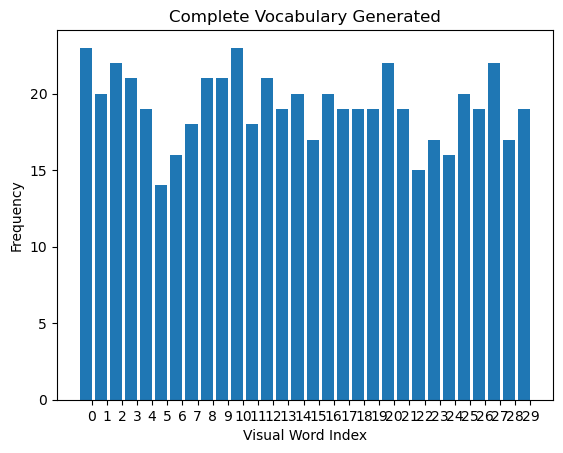

Features histogram plotted.


In [15]:
path = r'F:\Assignment2'
kmeans, scale, im_features = trainModel(path, 30)


In [115]:
print(im_features.shape)


(91, 30)


In [146]:
def svcParamSelection(X, y, kernel, nfolds):
    Cs = [0.5, 0.1, 0.15, 0.2, 0.3]
    gammas = [0.1, 0.11, 0.095, 0.105]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel=kernel), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [145]:
def findSVM(im_features, train_labels, kernel):
    features = im_features
    if(kernel == "precomputed"):
      features = np.dot(im_features, im_features.T)
    
    params = svcParamSelection(features, train_labels, kernel, 5)
    C_param, gamma_param = params.get("C"), params.get("gamma")
    print(C_param, gamma_param)
    class_weight = {
        0: (91 / (2 * 36)),
        1: (91 / (2 * 55))
      
    }
  
    svm = SVC(kernel = kernel, C =  C_param, gamma = gamma_param, class_weight = class_weight)
    svm.fit(features, train_labels)
    return svm

In [178]:
def plotConfusionMatrix1(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print(y_true)
    print(y_pred)
    print(classes)

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        print(cm_normalised)
    
        sns.heatmap(cm_normalised,cmap="Greens",annot=True,cbar_kws={"orientation":"vertical","label":"Color Bar"},
               xticklabels=classes,yticklabels=classes)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Normalized confusion matrix")
        plt.show()
    
   
    else:
        cm = confusion_matrix(y_true, y_pred)
        print('Confusion matrix, without normalization')
        print(cm)
        sns.heatmap(cm,cmap="Greens",annot=True,cbar_kws={"orientation":"vertical","label":"Color Bar"},
               xticklabels=classes,yticklabels=classes)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion matrix, without normalization")
        plt.show()

   

  

In [161]:
def plotConfusions(true, predictions):
    np.set_printoptions(precision=2)

    class_names = ["Bikes", "Horses"]
    plotConfusionMatrix1(true, predictions, classes=class_names,
                      title='Confusion matrix, without normalization')

    plotConfusionMatrix1(true, predictions, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()

  

In [121]:
def findAccuracy(true, predictions):
    print ('accuracy score: %0.3f' % accuracy_score(true, predictions))

In [184]:
## SVM parameters after training the model with the train images

print(im_features.shape)
path = r'F:\Assignment2'
images = getFiles(True, path)
print(len(images))
print("Train images path detected.")
image_count = len(images)
train_labels = np.array([])

for img_path in images:
    if("Bikes" in img_path):
        class_index = 0
    elif("Horses" in img_path):
        class_index = 1
    
    train_labels = np.append(train_labels, class_index)

svm = findSVM(im_features, train_labels, kernel='precomputed')
print("SVM fitted.")
print("Training completed.")

(91, 30)
91
Train images path detected.
0.3 0.1
SVM fitted.
Training completed.


In [185]:
print(train_labels.shape)

(91,)


In [190]:
def testModel(path, kmeans, scale, svm, im_features, no_clusters, kernel):
    test_images = getFiles(False, path)
    print("Test images path detected.")
    print(len(test_images))

    count = 0
    true = []
    descriptor_list = []

    name_dict =	{
        "0": "Bikes",
        "1": "Horses"
        #"2": "Others"
        
    }

    sift = cv2.xfeatures2d.SIFT_create()

    for img_path in test_images:
        img = readImage(img_path)
        des = getDescriptors(sift, img)

        if(des is not None):
            count += 1
            descriptor_list.append(des)

            if("Bikes" in img_path):
                true.append("Bikes")
            elif("Horses" in img_path):
                true.append("Horses")
            #else:
                #true.append("Others")

    descriptors = vstackDescriptors(descriptor_list)

    test_features = extractFeatures(kmeans, descriptor_list, count, no_clusters)

    test_features = scale.transform(test_features)
    
    return test_features, true
    
   

In [188]:
# calling the test function to get the test_features for the test images

test_path = r'F:\Assignment2\Test'
no_clusters=30
test_features, true=testModel(test_path, kmeans, scale, svm, im_features, no_clusters, kernel='precomputed')
print(true)
print(test_features)

Test images path detected.
4
[[93. 53. 18. ...  0.  1.  5.]
 [ 0.  0. 58. ...  0.  0.  0.]
 [20. 37.  3. ... 66.  0.  0.]
 ...
 [ 0.  0.  0. ...  4.  0.  1.]
 [ 0.  0.  0. ... 16. 54. 22.]
 [ 8. 15. 55. ...  0.  0.  0.]]
started
Outer Loop cpunter
0
Inner Counter
0 0
Inner Counter
0 1
Inner Counter
0 2
Inner Counter
0 3
Inner Counter
0 4
Inner Counter
0 5
Inner Counter
0 6
Inner Counter
0 7
Inner Counter
0 8
Inner Counter
0 9
Inner Counter
0 10
Inner Counter
0 11
Inner Counter
0 12
Inner Counter
0 13
Inner Counter
0 14
Inner Counter
0 15
Inner Counter
0 16
Inner Counter
0 17
Inner Counter
0 18
Inner Counter
0 19
Inner Counter
0 20
Inner Counter
0 21
Inner Counter
0 22
Inner Counter
0 23
Inner Counter
0 24
Inner Counter
0 25
Inner Counter
0 26
Inner Counter
0 27
Inner Counter
0 28
Inner Counter
0 29
Inner Counter
0 30
Inner Counter
0 31
Inner Counter
0 32
Inner Counter
0 33
Inner Counter
0 34
Inner Counter
0 35
Inner Counter
0 36
Inner Counter
0 37
Inner Counter
0 38
Inner Counter
0 39


[[-0.54 -0.47 -0.58 -0.53 -0.46 -0.32  0.11 -0.3  -0.43 -0.32  0.01 -0.42
   0.24 -0.31 -0.42  0.07 -0.37 -0.52 -0.68 -0.31 -0.37 -0.43 -0.01 -0.27
   0.71 -0.45 -0.05 -0.34 -0.32 -0.3 ]
 [-0.43 -0.67 -0.26 -0.65 -0.11  0.11  0.34 -0.4  -0.52 -0.49 -0.27 -0.51
  -0.14 -0.14 -0.4   0.47 -0.4  -0.43 -0.61 -0.67 -0.52 -0.37 -0.19 -0.52
   0.39 -0.25 -0.41 -0.76 -0.23 -0.48]
 [ 1.43  0.91  1.34  2.19  1.66  0.75  0.39  0.93  3.    1.25  1.67  0.8
   1.21  1.32  2.45  1.1   1.03  1.1   1.3   1.42  1.15  1.03  0.23  1.24
   0.51  1.68  1.33  1.57  1.2   1.3 ]
 [ 1.1   1.15  1.05  1.51  1.59 -0.21 -0.02  2.71  0.33  1.11  0.39  1.88
   1.37  1.44  1.03  0.23  1.03  1.07  0.93  1.78  1.12  0.25 -0.32  1.28
   0.22  1.3   0.15  0.69 -0.04  1.27]]
[[ 5.61e-01  5.69e+00 -1.42e+00 -1.31e+00  4.03e+00 -2.35e+01  8.88e-01
  -1.36e+00  5.75e+00  4.56e+00  2.51e+00  2.28e+00  2.13e+00  5.13e+00
   1.99e+00  4.35e+00  4.59e+00  6.19e+00  3.32e+00  3.71e+00  6.70e+00
   5.98e+00  5.63e+00 -1.52e+01  2.4

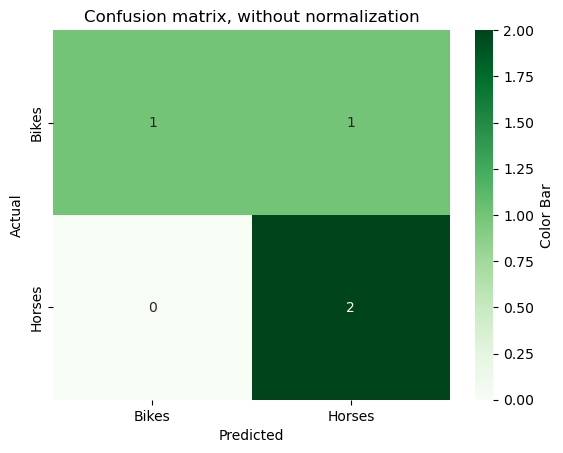

['Bikes', 'Bikes', 'Horses', 'Horses']
['Horses', 'Bikes', 'Horses', 'Horses']
['Bikes', 'Horses']
Normalized confusion matrix
[[0.5 0.5]
 [0.  1. ]]


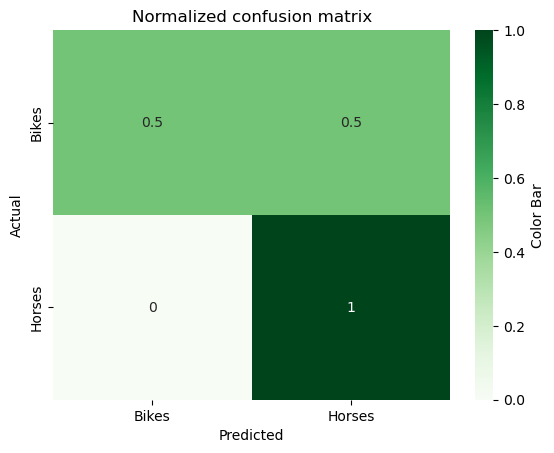

Confusion matrixes plotted.
accuracy score: 0.750
Accuracy calculated.
Execution done.


In [189]:
## Predict the Test Data set using the trained SVM kernel

kernel_test = test_features
print(kernel_test)

kernel_test = np.dot(test_features, im_features.T)
print(kernel_test)
    
predictions = [name_dict[str(int(i))] for i in svm.predict(kernel_test)]
print("Test images classified.")

print(predictions)
print(true)

## Plot the confusion matrix and the accuracy

plotConfusions(true, predictions)
print("Confusion matrixes plotted.")

findAccuracy(true, predictions)
print("Accuracy calculated.")
print("Execution done.")
